# Support Vector Machines

A SVM is a powerful and versatile Machine Learning model, capable of performing:
- Linear or Non-Linear Classification
- Regressions
- Outlier Detection
It is well suited for classification of complex small or medium sized datasets.

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Importing Dataset

_**Columns:** Sepal Length, Sepal Width, Petal Length and Petal Width_

_**Targets:** Setosa, Versicolour, and Virginica_

In [52]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]  # petal length, petal width
y = iris['target']

y_virginica = (y==2).astype(np.float64)

setosa_or_versicolor = (y == 0) | (y == 1)
versicolor_or_virginica = (y == 1) | (y == 2)

X_sve = X[setosa_or_versicolor]
y_sve = y[setosa_or_versicolor]

X_vv = X[versicolor_or_virginica]
y_vv = y[versicolor_or_virginica]

Plotting the data:

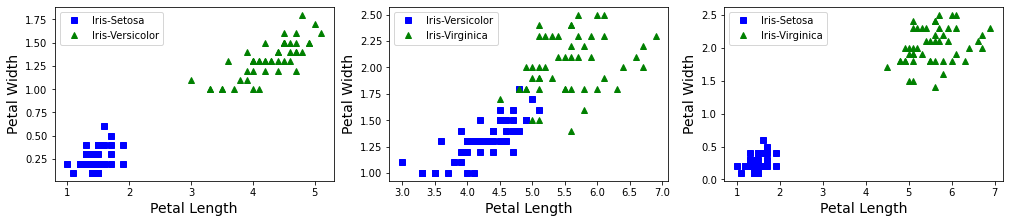

In [81]:
plt.figure(figsize=(17, 3.2))

plt.subplot(131)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs', label='Iris-Setosa')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^', label='Iris-Versicolor')
plt.legend(loc='upper left')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)

plt.subplot(132)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris-Versicolor')
plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris-Virginica')
plt.legend(loc='upper left')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)

plt.subplot(133)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs', label='Iris-Setosa')
plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris-Virginica')
plt.legend(loc='upper left')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)


plt.show()

# Linear Classifications

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf1 = SVC(kernel='linear', C=1)
svm_clf1.fit(X_vv, y_vv)

svm_clf2 = SVC(kernel='linear', C=100)
svm_clf2.fit(X_vv, y_vv)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # At the decision boundary w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = (-w[0]/w[1] * x0) - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)

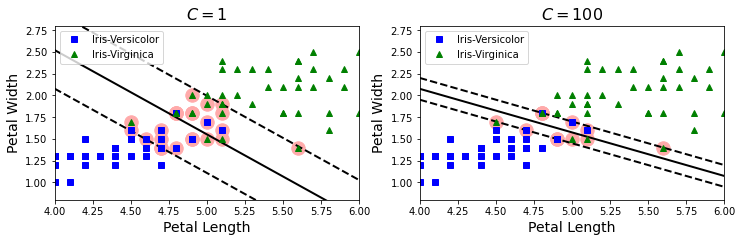

In [74]:
plt.figure(figsize=(12, 3.2))

plt.subplot(121)
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris-Versicolor')
plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris-Virginica')
plt.legend(loc='upper left')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.title(f'$C={svm_clf1.C}$', fontsize=16)

plt.subplot(122)
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris-Versicolor')
plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris-Virginica')
plt.legend(loc='upper left')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.title(f'$C={svm_clf2.C}$', fontsize=16)

plt.show()

As we can see the street gap decreases as we increase `C`. This is one of the hyperparameters we can use to regularize the model

# Non-Linear Classification

### Importing Data and Visualizing the data

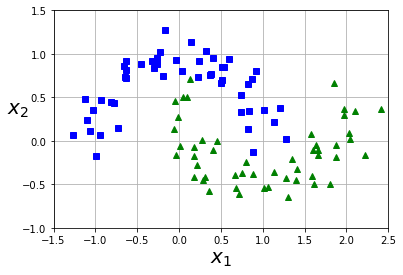

In [103]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel('$x_1$', fontsize=20)
    plt.ylabel('$x_2$', fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Let's try out some models

In [104]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42)),
])

polynomial_svm_clf.fit(X, y)

D:\Softwares\Python\Python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [105]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

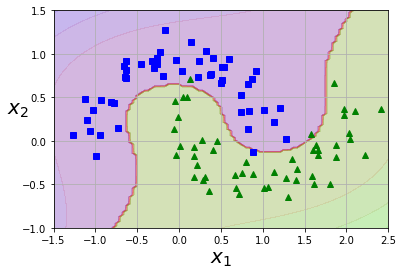

In [106]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

#### Trying Kernel SVM

In [111]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

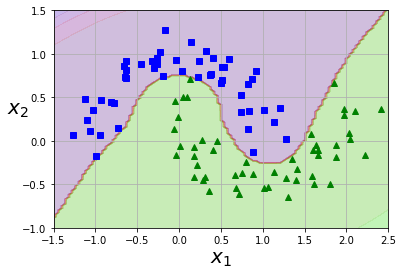

In [112]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()